# Классификация грибов на съедобные и несъедобные
Этот датасет включает описания гипотетических образцов, соответствующих 23 видам грибов из семейства Шампиньоновых. На основании 22 физических характеристик грибы разделяются на два класса: съедобные и несъедобные (определенно ядовитые или неопределенной съедобности и не рекомендуемые к употреблению).
Рассмотрим каждый признак:
1. форма шляпки (cap-shape): bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
2. поферхность шляпки (cap-surface): fibrous=f,grooves=g,scaly=y,smooth=s
3. цвет шляпки (cap-color): brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
4. синяки (bruises): bruises=t,no=f
5. запах (odor): almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
6. Форма гимениальной пластики/ламелы (gill-attachment): attached=a,descending=d,free=f,notched=n
7. Размещение гимениальной пластики/ламелы (gill-spacing): close=c,crowded=w,distant=d
8. Размер гимениальной пластики/ламелы (gill-size): broad=b,narrow=n
9. Цвет гимениальной пластики/ламелы (gill-color): black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
10. Форма стебля (stalk-shape): enlarging=e,tapering=t
11. Корень стебля (stalk-root): bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
12. Поверхность стебля над кольцом (stalk-surface-above-ring): fibrous=f,scaly=y,silky=k,smooth=s
13. Поверхность стебля под кольцом (stalk-surface-below-ring): fibrous=f,scaly=y,silky=k,smooth=s
14. Цвет стебля над кольцом (stalk-color-above-ring): brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
15. Цвет стебля под кольцом (stalk-color-below-ring): brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
16. Тип вуали (veil-type): partial=p,universal=u
17. Цвет вуали (veil-color): brown=n,orange=o,white=w,yellow=y
18. Количество колец (ring-number): none=n,one=o,two=t
19. Тип колец (ring-type): cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
20. Цвет спор (spore-print-color): black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
21. Тип популяции (population): abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
22. Среда обитания (habitat): grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

## 1. Чтение данных

In [1]:
from sklearn.datasets import fetch_openml

dataset = fetch_openml('mushroom', as_frame=True, return_X_y=True)
X, Y = dataset[0], dataset[1]
X.head()

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g


In [2]:
X.describe()

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,6,4,10,2,9,2,2,2,12,2,...,4,9,9,1,4,3,5,9,6,7
top,x,y,n,f,n,f,c,b,b,t,...,s,w,w,p,w,o,p,w,v,d
freq,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


Тип вуали имеет только одно уникальное значение, имеет смысл удалить этот столбец

In [3]:
X = X.drop(columns=['veil-type'], axis=1)

Пропущенные значения наблюдается только в столбце "корень стебля"

## Визуализация данных по категориальным признакам

Проверим сбалансированность классов. Классы сбалансированны.

Text(0.5, 0, 'Классы')

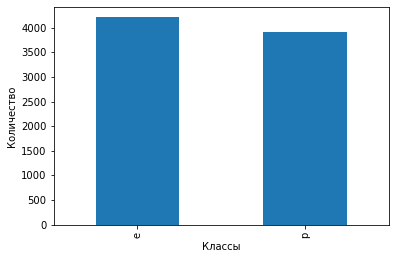

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

plt.figure()
pd.Series(Y).value_counts().sort_index().plot(kind = 'bar')
plt.ylabel("Количество")
plt.xlabel("Классы")

Построим гистограмму которая показывает количество съедобных или несъедобных грибов на основании цвета шляпки. На основании цвета шляпки сложно сделать какие-либо выводы. Только грибы с фиолетовым или зеленым цветом шляпки являются полностью съедобными.

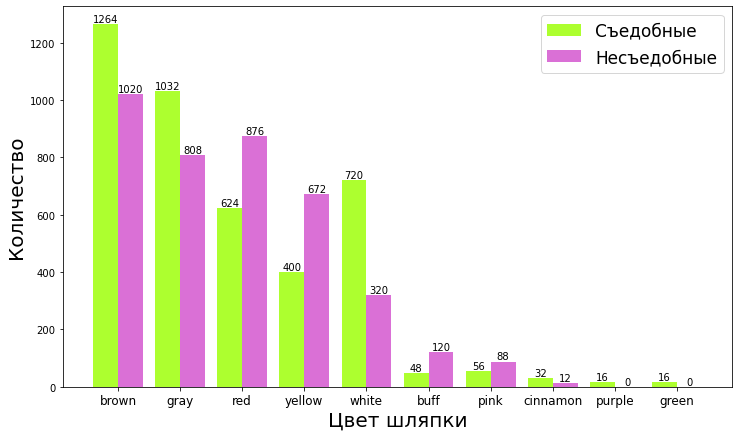

In [8]:

import numpy as np
cap_colors = X['cap-color'].value_counts()
m_height = cap_colors.values.tolist()
cap_colors.axes
cap_color_labels = cap_colors.axes[0].tolist()
ind = np.arange(10)

poisonous_cc = []
edible_cc = []
for capColor in cap_color_labels:
    size = len(X[X['cap-color'] == capColor].index)
    edibles = len(X[(X['cap-color'] == capColor) & (Y == 'e')].index)
    edible_cc.append(edibles)
    poisonous_cc.append(size-edibles)
                        
width = 0.40
fig, ax = plt.subplots(figsize=(12,7))
edible_bars = ax.bar(ind, edible_cc , width, color='#ADFF2F')
poison_bars = ax.bar(ind+width, poisonous_cc , width, color='#DA70D6')

def add_size_to_bar(rects,fontsize=14):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1*height,'%d' % int(height),
                ha='center', va='bottom',fontsize=fontsize)

ax.set_xlabel("Цвет шляпки",fontsize=20)
ax.set_ylabel('Количество',fontsize=20)
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('brown', 'gray','red','yellow','white','buff','pink','cinnamon','purple','green'),
                  fontsize = 12)
ax.legend((edible_bars,poison_bars),('Съедобные','Несъедобные'),fontsize=17)
add_size_to_bar(edible_bars, 10)
add_size_to_bar(poison_bars, 10)
plt.show()

Построим гистограмму которая показывает количество съедобных или несъедобных грибов на основании запаха. Можно заметить, что грибы с ужасным/рыбным/острым/едким/креозотовым/затхлым запахом всегда являются несъедобными, а грибы с миндальным или анисовым запахом всегда съедобные. Нужно внимательно относится к грибам без запаха.

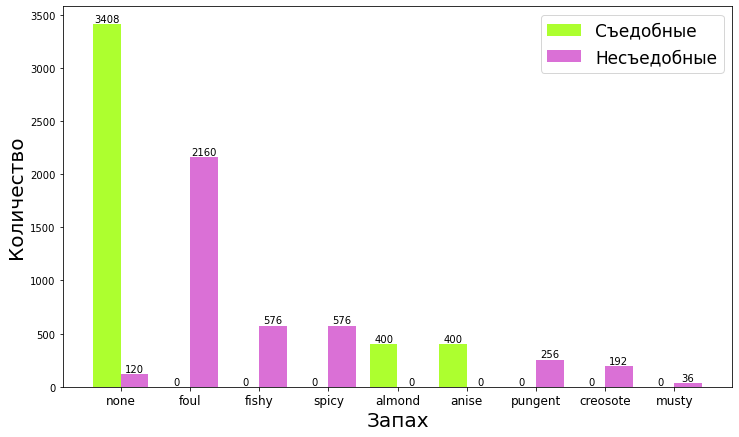

In [9]:
odors = X['odor'].value_counts()
odor_labels = odors.axes[0].tolist()
poisonous_od = []
edible_od = []
for odor in odor_labels:
    size = len(X[X['odor'] == odor].index)
    edibles = len(X[(X['odor'] == odor) & (Y == 'e')].index)
    edible_od.append(edibles)
    poisonous_od.append(size-edibles)
                        
width = 0.40
ind = np.arange(9)
fig, ax = plt.subplots(figsize=(12,7))
edible_bars = ax.bar(ind, edible_od , width, color='#ADFF2F')
poison_bars = ax.bar(ind+width, poisonous_od , width, color='#DA70D6')

ax.set_xlabel("Запах",fontsize=20)
ax.set_ylabel('Количество',fontsize=20)
ax.set_xticks(ind + width / 2) #Positioning on the x axis
ax.set_xticklabels(('none', 'foul','fishy','spicy','almond','anise','pungent','creosote','musty'),
                  fontsize = 12)
ax.legend((edible_bars,poison_bars),('Съедобные','Несъедобные'),fontsize=17)
add_size_to_bar(edible_bars, 10)
add_size_to_bar(poison_bars, 10)
plt.show()

Построим матрицу корреляций между всеми признаками

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5]),
 [Text(0, 0.5, 'cap-shape'),
  Text(0, 1.5, 'cap-surface'),
  Text(0, 2.5, 'cap-color'),
  Text(0, 3.5, 'bruises%3F'),
  Text(0, 4.5, 'odor'),
  Text(0, 5.5, 'gill-attachment'),
  Text(0, 6.5, 'gill-spacing'),
  Text(0, 7.5, 'gill-size'),
  Text(0, 8.5, 'gill-color'),
  Text(0, 9.5, 'stalk-shape'),
  Text(0, 10.5, 'stalk-root'),
  Text(0, 11.5, 'stalk-surface-above-ring'),
  Text(0, 12.5, 'stalk-surface-below-ring'),
  Text(0, 13.5, 'stalk-color-above-ring'),
  Text(0, 14.5, 'stalk-color-below-ring'),
  Text(0, 15.5, 'veil-color'),
  Text(0, 16.5, 'ring-number'),
  Text(0, 17.5, 'ring-type'),
  Text(0, 18.5, 'spore-print-color'),
  Text(0, 19.5, 'population'),
  Text(0, 20.5, 'habitat'),
  Text(0, 21.5, 'class')])

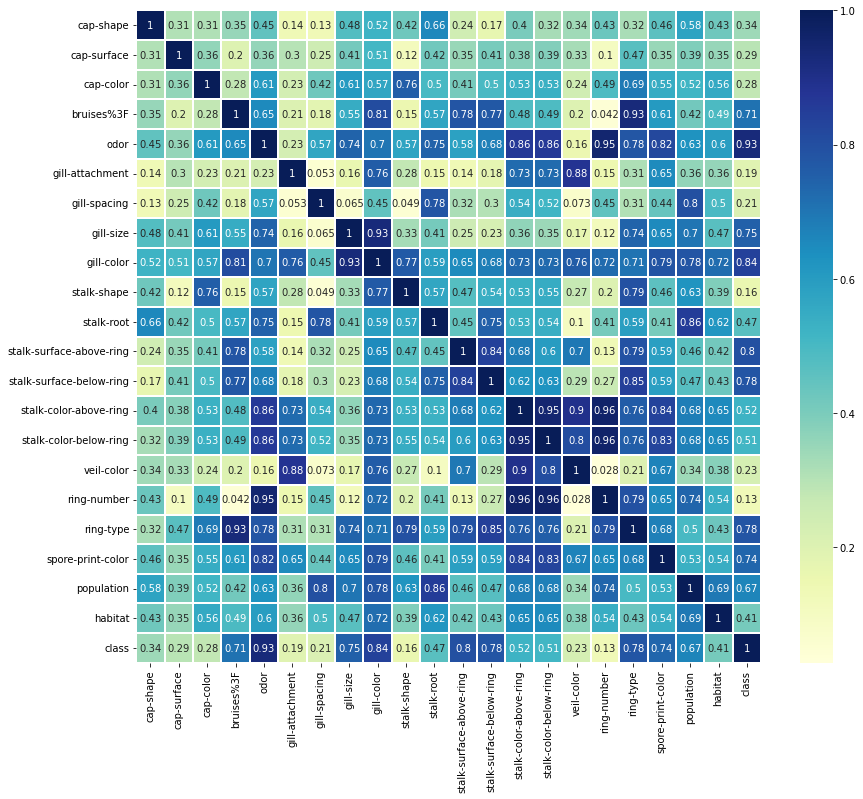

In [14]:
XY_merged = pd.concat([X, Y], axis = 1)
import seaborn as sns
plt.figure(figsize=(14,12))
sns.heatmap(XY_merged.phik_matrix(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0)

## Проверка пропущенных значений

In [16]:
print(X.isna().sum())

cap-shape                      0
cap-surface                    0
cap-color                      0
bruises%3F                     0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
dtype: int64


Пропущенные элементы есть только в одном столбце, удалим его

In [17]:
X = X.drop(columns=['stalk-root'], axis=1)

## Обработка категориальных признаков
Все признаки являются категориальными, используем OneHotEncoding чтобы преобразовать категориальные признаки к количественным. Получилось 111 признаков.
Также применим LabelEncoder к стобцу с классами.


In [37]:
from sklearn.preprocessing import LabelEncoder

labelencoder=LabelEncoder()
Y = labelencoder.fit_transform(Y)

from sklearn.preprocessing import OneHotEncoder

onehotencoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
s = (X.dtypes == 'category')
object_cols = list(s[s].index)
X = pd.DataFrame(onehotencoder.fit_transform(X[object_cols]))
print(X.head())

   0    1    2    3    4    5    6    7    8    9    ...  101  102  103  104  \
0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  ...  1.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  ...  0.0  0.0  0.0  0.0   
2  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  ...  1.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  ...  0.0  0.0  0.0  0.0   

   105  106  107  108  109  110  
0  0.0  0.0  0.0  0.0  1.0  0.0  
1  1.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  1.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  1.0  0.0  
4  1.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 111 columns]


## Нормализация
Проводить нормализацию нет необходимости, потому что все признаки являются категориальными.

## Разбиение на обучающую и тестовую выборки
Для тестовой выборки использую 20% от всего датасета


In [38]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,Y,random_state=42,test_size = 0.2)

## Классификатор ближайших соседей

In [39]:
from sklearn.neighbors import KNeighborsClassifier

knn_1k = KNeighborsClassifier(n_neighbors=1)
knn_3k = KNeighborsClassifier(n_neighbors=3)
knn_5k = KNeighborsClassifier(n_neighbors=5)
knn_10k = KNeighborsClassifier(n_neighbors=10)
knn_100k = KNeighborsClassifier(n_neighbors=100)

knn_1k.fit(x_train, y_train)
knn_3k.fit(x_train, y_train)
knn_5k.fit(x_train, y_train)
knn_10k.fit(x_train, y_train)
knn_100k.fit(x_train, y_train)

knn_1k_train_accuracy = round(knn_1k.score(x_train, y_train)*100, 4)
knn_1k_test_accuracy = round(knn_1k.score(x_test, y_test)*100, 4)

knn_3k_train_accuracy = round(knn_3k.score(x_train, y_train)*100, 4)
knn_3k_test_accuracy = round(knn_3k.score(x_test, y_test)*100, 4)

knn_5k_train_accuracy = round(knn_5k.score(x_train, y_train)*100, 4)
knn_5k_test_accuracy = round(knn_5k.score(x_test, y_test)*100, 4)

knn_10k_train_accuracy = round(knn_10k.score(x_train, y_train)*100, 4)
knn_10k_test_accuracy = round(knn_10k.score(x_test, y_test)*100, 4)

knn_100k_train_accuracy = round(knn_100k.score(x_train, y_train)*100, 4)
knn_100k_test_accuracy = round(knn_100k.score(x_test, y_test)*100, 4)

print("Knn n_neighbors = 1 Train Accuracy = {}% Test Accuracy = {}%".format(knn_1k_train_accuracy, knn_1k_test_accuracy))
print("Knn n_neighbors = 3 Train Accuracy = {}% Test Accuracy = {}%".format(knn_3k_train_accuracy, knn_3k_test_accuracy))
print("Knn n_neighbors = 5 Train Accuracy = {}% Test Accuracy = {}%".format(knn_5k_train_accuracy, knn_1k_test_accuracy))
print("Knn n_neighbors = 10 Train Accuracy = {}% Test Accuracy = {}%".format(knn_10k_train_accuracy, knn_10k_test_accuracy))
print("Knn n_neighbors = 100 Train Accuracy = {}% Test Accuracy = {}%".format(knn_100k_train_accuracy, knn_100k_test_accuracy))

Knn n_neighbors = 1 Train Accuracy = 100.0% Test Accuracy = 100.0%
Knn n_neighbors = 3 Train Accuracy = 100.0% Test Accuracy = 100.0%
Knn n_neighbors = 5 Train Accuracy = 100.0% Test Accuracy = 100.0%
Knn n_neighbors = 10 Train Accuracy = 100.0% Test Accuracy = 100.0%
Knn n_neighbors = 100 Train Accuracy = 99.4768% Test Accuracy = 99.5692%


После применения OneHotEncoding точность на тренировочной и тестовой выборке намного выше, чем при использовании LabelEncoding

## Классификация методом опорных векторов

In [40]:
from sklearn.svm import SVC

svm_linear = SVC(random_state=42, kernel="linear")
svm_linear.fit(x_train,y_train)
svm_linear_train_accuracy = round(svm_linear.score(x_train, y_train)*100, 4)
svm_linear_test_accuracy = round(svm_linear.score(x_test, y_test)*100, 4)

print("SVM Linear kernel Train Accuracy = {}% Test Accuracy: {}%".format(svm_linear_train_accuracy, svm_linear_test_accuracy))

svm_rbf = SVC(random_state=42, kernel="rbf")
svm_rbf.fit(x_train,y_train)
svm_rbf_train_accuracy = round(svm_rbf.score(x_train, y_train)*100, 4)
svm_rbf_test_accuracy = round(svm_rbf.score(x_test, y_test)*100, 4)

print("SVM RBF kernel Train Accuracy = {}% Test Accuracy: {}%".format(svm_rbf_train_accuracy, svm_rbf_test_accuracy))

SVM Linear kernel Train Accuracy = 100.0% Test Accuracy: 100.0%
SVM RBF kernel Train Accuracy = 100.0% Test Accuracy: 100.0%


При использовании SVM точность при использовании обоих кернел функций равна 100%

In [41]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=2, random_state=42)
clf.fit(x_train,y_train)
clf_train_accuracy = round(clf.score(x_train, y_train)*100, 4)
clf_test_accuracy = round(clf.score(x_test, y_test)*100, 4)

print("RF max_deph=2 Accuracy = {}% Test Accuracy: {}%".format(svm_linear_train_accuracy, svm_linear_test_accuracy))

clf = RandomForestClassifier(max_depth=10, random_state=42)
clf.fit(x_train,y_train)
clf_train_accuracy = round(clf.score(x_train, y_train)*100, 4)
clf_test_accuracy = round(clf.score(x_test, y_test)*100, 4)

print("RF max_deph=10 Accuracy = {}% Test Accuracy: {}%".format(svm_linear_train_accuracy, svm_linear_test_accuracy))

clf = RandomForestClassifier(random_state=42)
clf.fit(x_train,y_train)
clf_train_accuracy = round(clf.score(x_train, y_train)*100, 4)
clf_test_accuracy = round(clf.score(x_test, y_test)*100, 4)

print("RF max_deph=None Accuracy = {}% Test Accuracy: {}%".format(svm_linear_train_accuracy, svm_linear_test_accuracy))

RF max_deph=2 Accuracy = 100.0% Test Accuracy: 100.0%
RF max_deph=10 Accuracy = 100.0% Test Accuracy: 100.0%
RF max_deph=None Accuracy = 100.0% Test Accuracy: 100.0%


## Заключение
В результате работы была рассмотрена задача классификации на примере классификации грибов по их физическим свойствам на съедобные и не съедобные. Классы сбалансированны. Все признаки были категориальные, поэтому я применил LabelEncoding, который перевёл все признаки в числовые значения. Сильного разброса в значениях не было, поэтому нет необходимости использовать нормализацию. Значительных выбросов в данных не наблюдалось, пропущенные значения обработал LabelEncoding. Некоторые из признаков достаточно сильно коррелируют между собой.

Данные были разделены на тестовую и обучающую выборки и были переданы в модель классификатора ближайших соседей и машины опорных векторов. Получившаяся точность близка к 100%, на обоих классификаторах. Гиперпараметры достаточно сильно влияют на точность, поэтому были подобраны наилучшие параметры, показывающие наибольшую точность тестовой выборки.